In [1]:
# !git clone https://github.com/SamuunJinnie/pm2.5

Cloning into 'pm2.5'...


In [2]:
# !mv ./pm2.5/* .

In [1]:
provinces = ['BKK', 'Chiangmai', 'Khonkaen', 'Rayong', 'Saraburi', 'Surat']

In [1]:
import pandas as pd

In [2]:

def format_datetime(df):
  df['date_time'] = pd.to_datetime(df['date_time'])
  df = df.set_index('date_time')
  return df

In [3]:
def format_datetime_2(df):
    df['date_time'] = pd.to_datetime(df['date_time'] , format='%d/%m/%Y %H:%M')
    df = df.set_index('date_time')
    return df

In [4]:
def get_train_data(prov):
  df_train = pd.read_csv(prov + '/train/' + prov.lower() + '_train.csv')
  df_temp_surface = pd.read_csv(prov + '/train/' + prov.lower() + '_temp_surface.csv')
  df_weather_wind = pd.read_csv(prov + '/train/' + prov.lower() + '_weather_wind.csv')
  df_so2 = pd.read_csv(prov + '/train/' + prov.lower() + '_so2_surface_train.csv')
  df_rh = pd.read_csv(prov + '/train/' + prov.lower() + '_RH_train.csv')
  df_train = df_train.rename(columns={'Unnamed: 0':'date_time'})
  df_train, df_temp_surface, df_weather_wind, df_so2, df_rh = format_datetime(df_train), format_datetime(df_temp_surface), format_datetime(df_weather_wind), format_datetime(df_so2), format_datetime(df_rh)
  df_train, df_temp_surface, df_weather_wind, df_so2, df_rh = df_train.interpolate(), df_temp_surface.interpolate(), df_weather_wind.interpolate(), df_so2.interpolate(), df_rh.interpolate()
  df_train, df_temp_surface, df_weather_wind, df_so2, df_rh = df_train.resample('h').ffill(), df_temp_surface.resample('h').ffill(), df_weather_wind.resample('h').ffill(), df_so2.resample('h').ffill(), df_rh.resample('h').ffill()
  return df_train, df_temp_surface, df_weather_wind, df_so2, df_rh

In [5]:
def get_test_data(prov):
  df_test = pd.read_csv(f'{prov}/test/{prov.lower()}_test.csv')
  df_temp_surface_test = pd.read_csv(f'{prov}/test/{prov.lower()}_temp_surface_test.csv')
  df_weather_wind_test = pd.read_csv(f'{prov}/test/{prov.lower()}_weather_wind_test.csv')
  df_so2_test = pd.read_csv(prov + '/test/' + prov.lower() + '_so2_surface_test.csv')
  df_rh_test = pd.read_csv(prov + '/test/' + prov.lower() + '_RH_test.csv')
  df_test = df_test.rename(columns={'Unnamed: 0':'date_time'})
  df_test, df_temp_surface_test, df_weather_wind_test, df_so2_test, df_rh_test = format_datetime(df_test), format_datetime_2(df_temp_surface_test), format_datetime_2(df_weather_wind_test),format_datetime(df_so2_test),format_datetime(df_rh_test)
  df_test, df_temp_surface_test, df_weather_wind_test, df_so2_test, df_rh_test = df_test.interpolate(), df_temp_surface_test.interpolate(), df_weather_wind_test.interpolate(), df_so2_test.interpolate(), df_rh_test.interpolate()
  df_test, df_temp_surface_test,df_weather_wind_test, df_so2_test, df_rh_test = df_test.resample('h').ffill(), df_temp_surface_test.resample('h').ffill(), df_weather_wind_test.resample('h').ffill(), df_so2_test.resample('h').ffill(), df_rh_test.resample('h').ffill()
  return df_test, df_temp_surface_test, df_weather_wind_test, df_so2_test, df_rh_test

In [6]:
def get_na_rows(df, col):
  return df[df[col].isna() == True].index.to_list()

In [7]:
df_train, df_temp_surface, df_weather_wind, df_so2, df_rh = get_train_data('Chiangmai')
df_test, df_temp_surface_test, df_weather_wind_test, df_so2_test, df_rh_test = get_test_data('Chiangmai')

In [8]:
display(df_test.tail())
display(df_temp_surface_test.tail())
display(df_weather_wind_test.tail())
display(df_so2_test.tail())
display(df_rh_test.tail())

,PM2.5
date_time,
2021-07-01 19:00:00,13.0
2021-07-01 20:00:00,13.0
2021-07-01 21:00:00,13.0
2021-07-01 22:00:00,13.0
2021-07-01 23:00:00,13.0


,temp
date_time,
2021-07-01 18:00:00,30.0
2021-07-01 19:00:00,24.6
2021-07-01 20:00:00,24.6
2021-07-01 21:00:00,24.6
2021-07-01 22:00:00,23.5


,wind speed,wind dir
date_time,,
2021-07-01 18:00:00,20,235
2021-07-01 19:00:00,23,250
2021-07-01 20:00:00,23,250
2021-07-01 21:00:00,23,250
2021-07-01 22:00:00,27,260


,so2 (ug/m^3)
date_time,
2021-07-01 18:00:00,0.47
2021-07-01 19:00:00,1.43
2021-07-01 20:00:00,1.43
2021-07-01 21:00:00,1.43
2021-07-01 22:00:00,3.03


,RH
date_time,
2021-07-01 18:00:00,61.0
2021-07-01 19:00:00,83.0
2021-07-01 20:00:00,83.0
2021-07-01 21:00:00,83.0
2021-07-01 22:00:00,86.0


In [9]:
display(df_train.tail())
display(df_temp_surface.tail())
display(df_weather_wind.tail())
display(df_so2.tail())
display(df_rh.tail())

,PM2.5
date_time,
2020-06-30 19:00:00,16.0
2020-06-30 20:00:00,19.0
2020-06-30 21:00:00,21.0
2020-06-30 22:00:00,14.0
2020-06-30 23:00:00,18.0


,temp
date_time,
2020-06-30 18:00:00,32.2
2020-06-30 19:00:00,27.5
2020-06-30 20:00:00,27.5
2020-06-30 21:00:00,27.5
2020-06-30 22:00:00,25.2


,wind speed,wind dir
date_time,,
2020-06-30 18:00:00,12,235
2020-06-30 19:00:00,16,235
2020-06-30 20:00:00,16,235
2020-06-30 21:00:00,16,235
2020-06-30 22:00:00,17,225


,so2 (ug/m^3)
date_time,
2020-06-30 18:00:00,0.36
2020-06-30 19:00:00,1.01
2020-06-30 20:00:00,1.01
2020-06-30 21:00:00,1.01
2020-06-30 22:00:00,1.97


,RH
date_time,
2020-06-30 18:00:00,56.0
2020-06-30 19:00:00,72.0
2020-06-30 20:00:00,72.0
2020-06-30 21:00:00,72.0
2020-06-30 22:00:00,82.0


In [10]:
import matplotlib.pyplot as plt

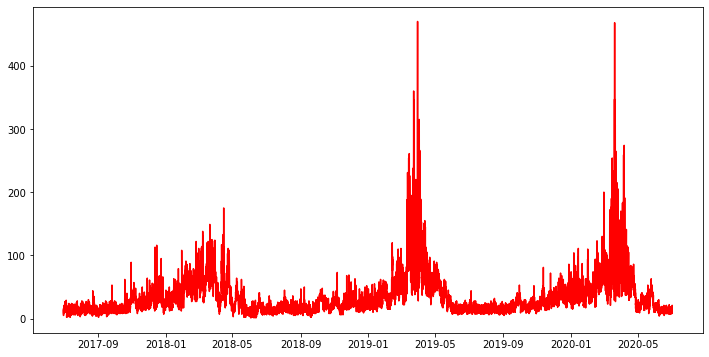

In [11]:
plt.figure(figsize=(12,6))
plt.plot(df_train,'r')

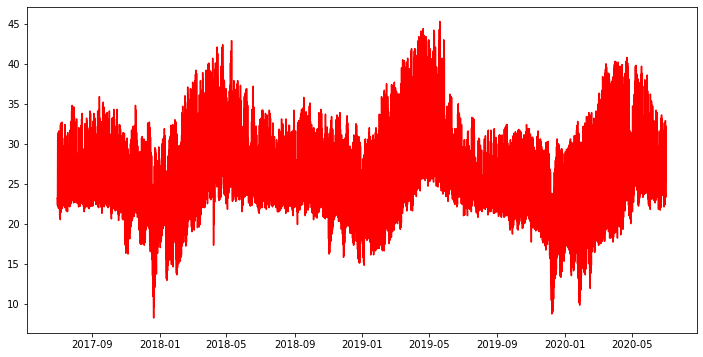

In [12]:
plt.figure(figsize=(12,6))
plt.plot(df_temp_surface,'r')

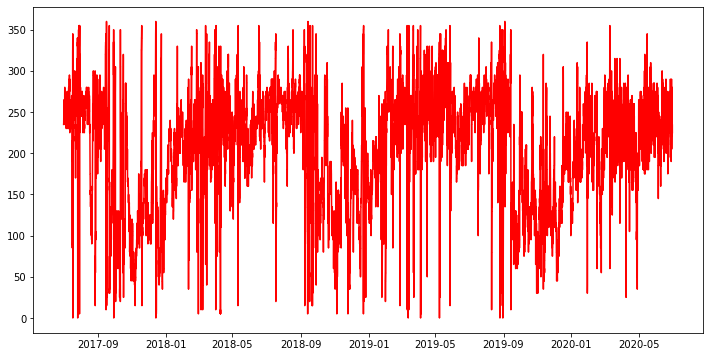

In [13]:
plt.figure(figsize=(12,6))
plt.plot(df_weather_wind['wind dir'],'r')

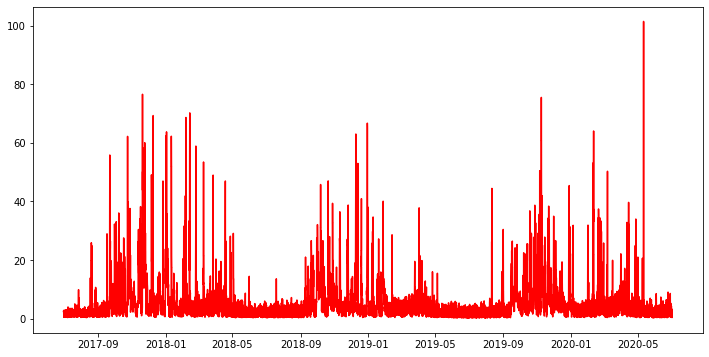

In [14]:
plt.figure(figsize=(12,6))
plt.plot(df_so2['so2 (ug/m^3)'],'r')

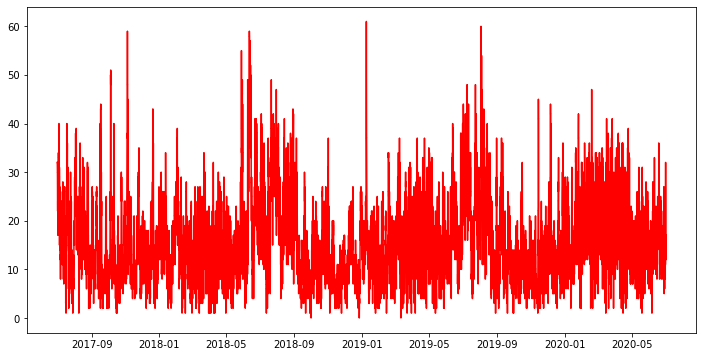

In [15]:
plt.figure(figsize=(12,6))
plt.plot(df_weather_wind['wind speed'],'r')

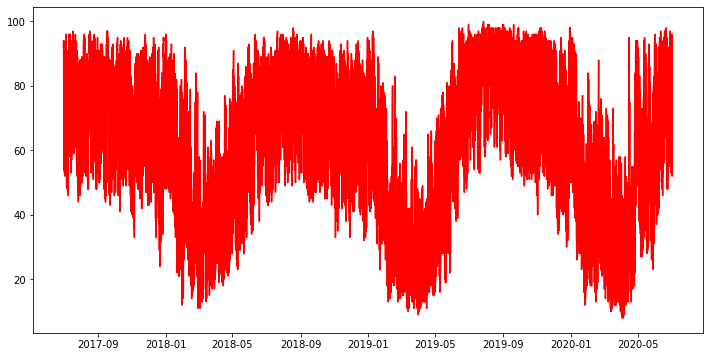

In [16]:
plt.figure(figsize=(12,6))
plt.plot(df_rh['RH'],'r')

In [17]:
df_temp_0 = pd.DataFrame({'date_time': ['07/01/2017 00:00:00'], 'temp':[0]})
df_temp_0 = format_datetime(df_temp_0)
df_wind_0 = pd.DataFrame({'date_time': ['07/01/2017 00:00:00'], 'wind dir':[0],'wind speed':[0]})
df_wind_0 = format_datetime(df_wind_0)
df_so2_0 = pd.DataFrame({'date_time': ['07/01/2017 00:00:00'], 'so2 (ug/m^3)':[0]})
df_so2_0 = format_datetime(df_so2_0)
df_rh_0 = pd.DataFrame({'date_time': ['07/01/2017 00:00:00'], 'RH':[0]})
df_rh_0 = format_datetime(df_rh_0)

In [18]:
df_temp_1 = pd.DataFrame({'date_time': ['06/30/2020 23:00:00'], 'temp':[df_temp_surface['temp'].iloc[26301]]})
df_temp_1 = format_datetime(df_temp_1)
df_wind_1 = pd.DataFrame({'date_time': ['06/30/2020 23:00:00'], 'wind dir':[df_weather_wind['wind dir'].iloc[26301]],'wind speed':[df_weather_wind['wind speed'].iloc[26301]]})
df_wind_1 = format_datetime(df_wind_1)
df_so2_1 = pd.DataFrame({'date_time': ['06/30/2020 23:00:00'], 'so2 (ug/m^3)':[df_so2['so2 (ug/m^3)'].iloc[26301]]})
df_so2_1 = format_datetime(df_so2_1)
df_rh_1 = pd.DataFrame({'date_time': ['06/30/2020 23:00:00'], 'RH':[df_rh['RH'].iloc[26301]]})
df_rh_1 = format_datetime(df_rh_1)

In [19]:
df_temp_surface = pd.concat([df_temp_0,df_temp_surface,df_temp_1])
df_weather_wind = pd.concat([df_wind_0,df_weather_wind,df_wind_1])
df_so2 = pd.concat([df_so2_0,df_so2,df_so2_1])
df_rh = pd.concat([df_rh_0,df_rh,df_rh_1])

In [20]:
data = df_train.merge(df_weather_wind,left_index=True,right_index=True)
data = data.merge(df_temp_surface,left_index=True,right_index=True)
data = data.merge(df_so2,left_index=True,right_index=True)
data = data.merge(df_rh,left_index=True,right_index=True)
data

,PM2.5,wind dir,wind speed,temp,so2 (ug/m^3),RH
date_time,,,,,,
2017-07-01 00:00:00,13.0,0,0,0.0,0.00,0.0
2017-07-01 01:00:00,5.0,235,32,23.2,2.46,92.0
2017-07-01 02:00:00,16.0,235,32,23.2,2.46,92.0
2017-07-01 03:00:00,11.0,235,32,23.2,2.46,92.0
2017-07-01 04:00:00,12.0,250,30,22.3,2.29,94.0
...,...,...,...,...,...,...
2020-06-30 19:00:00,16.0,235,16,27.5,1.01,72.0
2020-06-30 20:00:00,19.0,235,16,27.5,1.01,72.0
2020-06-30 21:00:00,21.0,235,16,27.5,1.01,72.0


In [21]:
df_temp_test_0 = pd.DataFrame({'date_time': ['07/01/2020 00:00:00'], 'temp':[0]})
df_temp_test_0 = format_datetime(df_temp_test_0)
df_wind_test_0 = pd.DataFrame({'date_time': ['07/01/2020 00:00:00'], 'wind dir':[0],'wind speed':[0]})
df_wind_test_0 = format_datetime(df_wind_test_0)
df_so2_test_0 = pd.DataFrame({'date_time': ['07/01/2020 00:00:00'], 'so2 (ug/m^3)':[0]})
df_so2_test_0 = format_datetime(df_so2_test_0)
df_rh_test_0 = pd.DataFrame({'date_time': ['07/01/2020 00:00:00'], 'RH':[0]})
df_rh_test_0 = format_datetime(df_rh_test_0)

In [22]:
df_temp_test_1 = pd.DataFrame({'date_time': ['07/01/2021 23:00:00'], 'temp':[df_temp_surface_test['temp'].iloc[8781]]})
df_temp_test_1 = format_datetime(df_temp_test_1)
df_wind_test_1 = pd.DataFrame({'date_time': ['07/01/2021 23:00:00'], 'wind dir':[df_weather_wind_test['wind dir'].iloc[8781]],'wind speed':[df_weather_wind_test['wind speed'].iloc[8781]]})
df_wind_test_1 = format_datetime(df_wind_test_1)
df_so2_test_1 = pd.DataFrame({'date_time': ['07/01/2021 23:00:00'], 'so2 (ug/m^3)':[df_so2_test['so2 (ug/m^3)'].iloc[8781]]})
df_so2_test_1 = format_datetime(df_so2_test_1)
df_rh_test_1 = pd.DataFrame({'date_time': ['07/01/2021 23:00:00'], 'RH':[df_rh_test['RH'].iloc[8781]]})
df_rh_test_1 = format_datetime(df_rh_test_1)

In [23]:
df_temp_surface_test = pd.concat([df_temp_test_0,df_temp_surface_test,df_temp_test_1])
df_weather_wind_test = pd.concat([df_wind_test_0,df_weather_wind_test,df_wind_test_1])
df_so2_test = pd.concat([df_so2_test_0,df_so2_test,df_so2_test_1])
df_rh_test = pd.concat([df_rh_test_0,df_rh_test,df_rh_test_1])

In [24]:
test = df_test.merge(df_temp_surface_test,left_index=True,right_index=True)
test['wind dir'] = df_weather_wind_test['wind dir'].values
test['wind speed'] = df_weather_wind_test['wind speed'].values
test = test.merge(df_so2_test,left_index=True,right_index=True)
test = test.merge(df_rh_test,left_index=True,right_index=True)
test

,PM2.5,temp,wind dir,wind speed,so2 (ug/m^3),RH
date_time,,,,,,
2020-07-01 00:00:00,13.0,0.0,0,0,0.00,0.0
2020-07-01 01:00:00,13.0,24.0,265,24,2.73,88.0
2020-07-01 02:00:00,11.0,24.0,265,24,2.73,88.0
2020-07-01 03:00:00,13.0,24.0,265,24,2.73,88.0
2020-07-01 04:00:00,12.0,23.4,280,23,2.95,91.0
...,...,...,...,...,...,...
2021-07-01 19:00:00,13.0,24.6,250,23,1.43,83.0
2021-07-01 20:00:00,13.0,24.6,250,23,1.43,83.0
2021-07-01 21:00:00,13.0,24.6,250,23,1.43,83.0


# Split data

In [25]:
#train_size, valid_size = map(lambda r: int(r*data.shape[0]), (0.7, 0.3))

In [26]:
#train, valid = data.iloc[:train_size], data.iloc[train_size:]
train = data

In [27]:
train.shape

(26304, 6)

In [28]:
#valid.shape

In [29]:
exog_columns = ['wind speed','wind dir','temp','so2 (ug/m^3)','RH']

# Fit model with exogenous data

In [30]:
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [31]:
from sklearn.model_selection import GridSearchCV

In [32]:
import math

In [33]:
pdq = [(0,0,1),(0,1,1),(0,2,1),(1,0,0),(1,1,0),(1,2,0),(0,0,2),]
seasonal_pdq = [(1,0,0,12),(0,0,1,12),(1,1,0,12),(0,1,1,12)]
params = [] 
params_s = [] 
aics = [] 
mses = []
cnt = 0 
for param in pdq:
  for param_seasonal in seasonal_pdq:
    mod = SARIMAX(train['PM2.5'],
    exog=train[exog_columns],
    order=param,
    seasonal_order=param_seasonal,
    freq='H',
    enforce_stationarity=False,
    enforce_invertibility=False)
    results = mod.fit()
    #test_exog = pd.concat((valid[exog_columns], test[exog_columns]), axis=0)
    pred = results.get_prediction(start=test.index[0], end=test.index[-1], exog=test[exog_columns], dynamic=False)
    pred_ci = pred.conf_int()
    params.append(param)
    params_s.append(param_seasonal)
    aics.append(results.aic)
    mse = mean_squared_error(test['PM2.5'], pred.predicted_mean)
    rmse = math.sqrt(mse) 
    mses.append(rmse)
    print('SARIMAX{}x{} - AIC:{} - MSE:{}'.format(param, param_seasonal,results.aic, mses[-1]))

SARIMAX(0, 0, 1)x(1, 0, 0, 12) - AIC:214635.41719843828 - MSE:23.1603875715688
SARIMAX(0, 0, 1)x(0, 0, 1, 12) - AIC:221010.20562449994 - MSE:19.886654885373268
SARIMAX(0, 0, 1)x(1, 1, 0, 12) - AIC:203250.4315167037 - MSE:26.135972457471567
SARIMAX(0, 0, 1)x(0, 1, 1, 12) - AIC:205040.45589241482 - MSE:25.261252972716612
SARIMAX(0, 1, 1)x(1, 0, 0, 12) - AIC:186416.9935636501 - MSE:23.662283040514307
SARIMAX(0, 1, 1)x(0, 0, 1, 12) - AIC:186409.09336534853 - MSE:23.653607465715115
SARIMAX(0, 1, 1)x(1, 1, 0, 12) - AIC:193151.66251574268 - MSE:887.2391510532823
SARIMAX(0, 1, 1)x(0, 1, 1, 12) - AIC:185205.6322191587 - MSE:20.405891641458837
SARIMAX(0, 2, 1)x(1, 0, 0, 12) - AIC:186472.08859486363 - MSE:23.690400397643604
SARIMAX(0, 2, 1)x(0, 0, 1, 12) - AIC:186464.97409549853 - MSE:23.703691755649473
SARIMAX(0, 2, 1)x(1, 1, 0, 12) - AIC:193427.4469022347 - MSE:846.8230801933702
SARIMAX(0, 2, 1)x(0, 1, 1, 12) - AIC:185213.8815075055 - MSE:25.34072869988353
SARIMAX(1, 0, 0)x(1, 0, 0, 12) - AIC:1

In [ ]:
train.shape

(18412, 4)

In [ ]:
def getBestParams(inputlist):
 
    #get the minimum value in the list
    min_value = min(inputlist)
 
    #return the index of minimum value 
    min_index=inputlist.index(min_value)
    return params[min_index], params_s[min_index]

In [ ]:
bestPDQ, bestSeasonalPDQ = getBestParams(mses)

In [ ]:
print(bestPDQ,bestSeasonalPDQ)

(0, 0, 1) (0, 1, 1, 12)


In [ ]:
mod = SARIMAX(train['PM2.5'],
              exog=train[exog_columns],
              order=bestPDQ,
              seasonal_order=bestSeasonalPDQ,
              enforce_stationarity=False,
              enforce_invertibility=False)

results = mod.fit()

print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
wind speed    -0.0646      0.012     -5.237      0.000      -0.089      -0.040
wind dir      -0.0074      0.001     -5.344      0.000      -0.010      -0.005
temp           0.2214      0.038      5.838      0.000       0.147       0.296
ma.L1          0.6893      0.004    187.354      0.000       0.682       0.697
ma.S.L12      -0.7307      0.004   -185.708      0.000      -0.738      -0.723
sigma2        58.9244      0.352    167.494      0.000      58.235      59.614


# Predict on test

In [ ]:
# test_exog = pd.concat((valid[exog_columns], test[exog_columns]), axis=0)

In [ ]:
pred = results.get_prediction(start=test.index[0], end=test.index[-1], exog=test_exog, dynamic=False)
pred_ci = pred.conf_int()

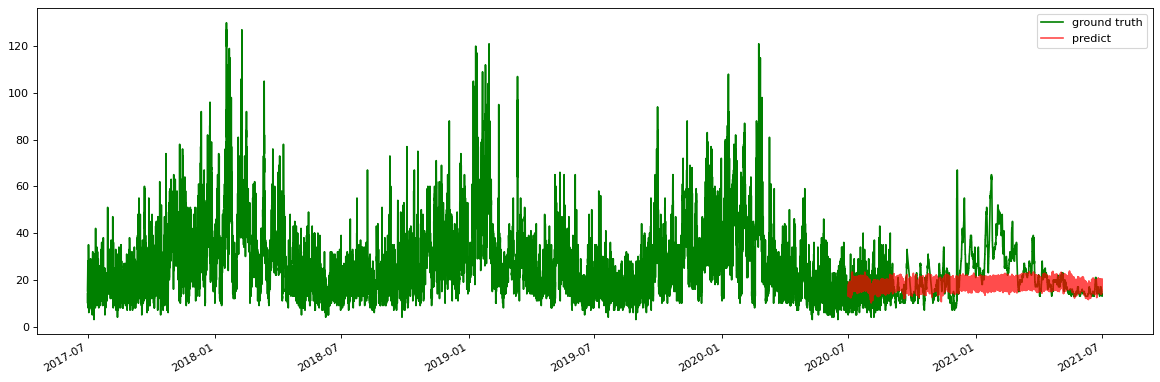

In [ ]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(18, 6), dpi=80, facecolor='w', edgecolor='k')
plt.plot(pd.concat([data['PM2.5'],test['PM2.5']]), color='g',label='ground truth')
pred.predicted_mean.plot(alpha=.7, color='r',label='predict')
plt.legend(loc="upper right")

plt.show()

In [ ]:
import math

In [ ]:
mse = mean_squared_error(test['PM2.5'], pred.predicted_mean)
rmse = math.sqrt(mse)
print('Test on SARIMAX with RMSE: %f' % (rmse, ))

Test on SARIMAX with RMSE: 9.712677


In [ ]:
pred.predicted_mean

2020-07-01 00:00:00    13.742506
2020-07-01 01:00:00    13.666879
2020-07-01 02:00:00    14.336152
2020-07-01 03:00:00    12.891660
2020-07-01 04:00:00    13.198602
                         ...    
2021-07-01 19:00:00    18.137218
2021-07-01 20:00:00    19.210351
2021-07-01 21:00:00    20.376057
2021-07-01 22:00:00    19.188949
2021-07-01 23:00:00    19.584362
Freq: H, Name: predicted_mean, Length: 8784, dtype: float64

In [59]:
pred.predicted_mean.to_csv('predict.csv', index=True)